# Project Billionaires Statistics
<hr>
The aim of this project is to explore and analyze the dataset with the goal of getting more information about the following:

 - Wealth distribution analysis: Explore the distribution of billionaires' wealth across different industries, countries, and regions. - Demographic analysis: Investigate the age, gender, and birthplace demographics of billionaires
 - Self-made vs. inherited wealth: Analyze the proportion of self-made billionaires and those who inherited their wealth.
 - Economic indicators: Study correlations between billionaire wealth and economic indicators such as GDP, CPI, and tax rates.
 - Geospatial analysis: Visualize the geographical distribution of billionaires and their wealth on a map.
 - Trends over time: Track changes in billionaire demographics and wealth over the years.

<hr>



### Let's explore the data

In [39]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Dataset: https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset
df = pd.read_csv('C:/Users/Marcos/Desktop/Billionaires Proyect/Data/Billionaires Statistics Dataset.csv')
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [5]:
# Let's see all the categories available
df['category'].unique()

array(['Fashion & Retail', 'Automotive', 'Technology',
       'Finance & Investments', 'Media & Entertainment', 'Telecom',
       'Diversified', 'Food & Beverage', 'Logistics',
       'Gambling & Casinos', 'Manufacturing', 'Real Estate',
       'Metals & Mining', 'Energy', 'Healthcare', 'Service',
       'Construction & Engineering', 'Sports'], dtype=object)

In [6]:
# How many categories are there
df['category'].nunique()

18

In [23]:
# At first glance, I had my suspicion that the category and industries column are the same, so i checked
# it and I was correct, so we can eliminate one because it is a duplicate of the other

set(df['category'].unique()) == set(df['industries'].unique())
# Returns True
set(df['category']) == set(df['industries'])
# Returns True

# We remove the category column
df_depurated = df.drop('category', axis=1)
# df_depurated.columns

Index(['rank', 'finalWorth', 'personName', 'age', 'country', 'city', 'source',
       'industries', 'countryOfCitizenship', 'organization', 'selfMade',
       'status', 'gender', 'birthDate', 'lastName', 'firstName', 'title',
       'date', 'state', 'residenceStateRegion', 'birthYear', 'birthMonth',
       'birthDay', 'cpi_country', 'cpi_change_country', 'gdp_country',
       'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

In [27]:
df_depurated.isna().sum()
# We can see multiple NA values but for now we are not going to touch them

rank                                             0
finalWorth                                       0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMade                                         0
status                                           0
gender                                           0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                                             0
state                                         1887
residenceStateRegion           

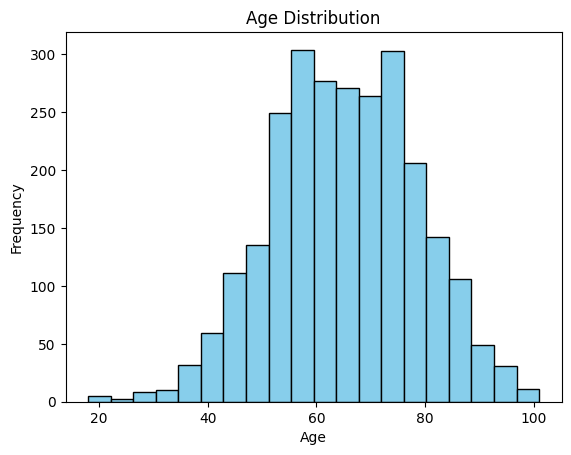

count    2575.000000
mean       65.140194
std        13.258098
min        18.000000
25%        56.000000
50%        65.000000
75%        75.000000
max       101.000000
Name: age, dtype: float64

In [45]:
plt.hist(df_depurated['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
# We can see a kind of symmetrical distribution with two peeks (58 and 74).

df_depurated['age'].describe()

<hr>

### Wealth distribution analysis

In [61]:
# Let's see how many billionaires are there:
n_billionaires = df_depurated['countryOfCitizenship'].count()
n_billionaires

2640

In [58]:
# Now let's see how many billionaires are per country
df_depurated['countryOfCitizenship'].value_counts().head(5)
# We can see that just China and United States represent almost 50% of all the billionaires in the world

United States    735
China            491
India            169
Germany          126
Russia           104
Name: countryOfCitizenship, dtype: int64

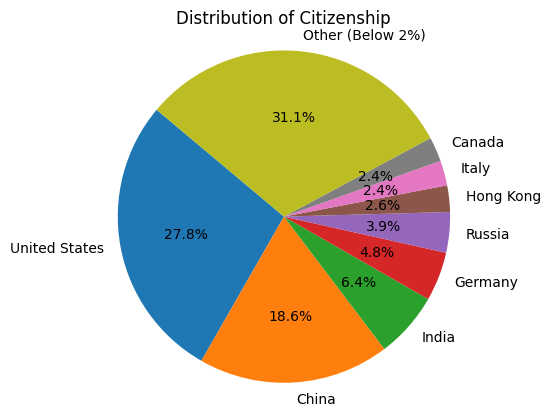

In [81]:
# Let's see this information in a graph
countries = df_depurated['countryOfCitizenship'].value_counts()
countries_filtered = countries[countries > (0.02 * n_billionaires)]
countries_filtered['Other (Below 2%)'] = countries[~filter].sum()
plt.pie(countries_filtered, labels=countries_filtered.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Citizenship')
plt.show()